# Building a Decision Tree

The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric. The records have been classified into one of the three classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'.

## Dataset Loading

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Preprocessing

### Divide data into training and test sets 

In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

It will shuffle the datasets prior to splitting using a internal __pseudo-random number generator__. With such a fixed random_state ensures that our results are __reproducible__.

In this context, `stratification` means that the `train_test_split` method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


## Performance Evaluation

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Misclassified samples: 1

Confusion Matrix:
[[15  0  0]
 [ 1 14  0]
 [ 0  0 15]]

Accuracy:  0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Training on the training dataset

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

A nice feature in scikit-learn is that it allows us to export the decision tree as a `.dot` file after training, which we can visualize using the `GraphViz` program, for example.

We may need install `pydotplus` via 
```
pip install pydotplus
```

and `graphviz` via
```
sudo apt install graphviz
```

In [5]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('pic/tree.png')

True

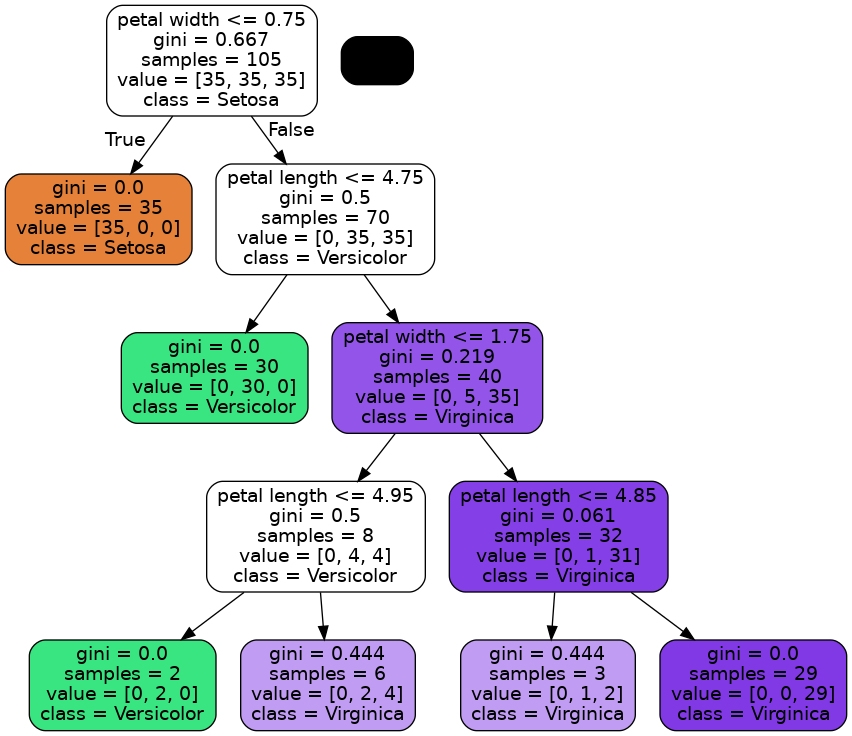

In [6]:
from IPython.display import Image

Image('pic/tree.png')

## Predicting on the test dataset

In [7]:
y_pred = tree.predict(X_test)

## Performance Evaluation

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Misclassified samples: 1

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Accuracy:  0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

